## Classification

In [13]:
# Import necessary modules
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

# Create feature and target arrays
x = digits.data
y = digits.target

# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### K-NN

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [12]:
print("Preliminary model score:")
print(knn.score(x_test,y_test))

no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(x_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)


Preliminary model score:
0.9583333333333334


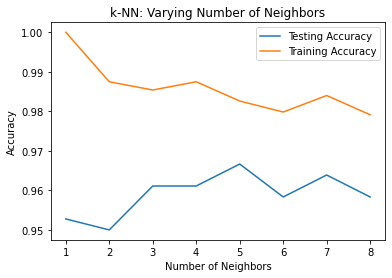

In [11]:
# Visualization of k values vs accuracy
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### k = 5 appears to have had the highest accuracy

### Support Vector Machine

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Create feature and target arrays
x = digits.data
y = digits.target

# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [24]:
# Create a classifier: a support vector classifier
classifier1 = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr',
                     degree=3, gamma='auto', kernel='linear', max_iter=-1,probability=False, 
                     random_state=None, shrinking=True, tol=0.001, verbose=False)
classifier2 = svm.SVC(C=200,kernel='rbf',gamma=0.01,cache_size=8000,probability=False)
# classifier1 = svm.SVC(kernel='linear',gamma=2)
# classifier2 = svm.SVC(kernel='rbf',gamma=2)
classifier3 = svm.SVC(kernel='poly',gamma=2)
# classifier = svm.SVC()

# We learn the digits on the first half of the digits
classifier1.fit(x_train, y_train)
classifier2.fit(x_train, y_train)
classifier3.fit(x_train, y_train)

# Now predict the value of the digit on the second half:
#expected = label_test
predicted1 = classifier1.predict(x_test)
predicted2 = classifier2.predict(x_test)
predicted3 = classifier3.predict(x_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier1, metrics.classification_report(y_test, predicted1)))
# print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted1))
print("Classification report for classifier %s:\n%s\n"
      % (classifier2, metrics.classification_report(y_test, predicted2)))
print("Classification report for classifier %s:\n%s\n"
      % (classifier3, metrics.classification_report(y_test, predicted3)))

Classification report for classifier SVC(gamma='auto', kernel='linear'):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.98      1.00      0.99        49
           2       1.00      1.00      1.00        36
           3       0.97      1.00      0.99        34
           4       0.97      1.00      0.99        34
           5       0.97      1.00      0.99        36
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        43
           8       1.00      0.97      0.99        34
           9       1.00      0.93      0.96        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


Classification report for classifier SVC(C=200, cache_size=8000, gamma=0.01):
              precision    recall  f1-score   support

           0       1.00      0.88 

### Naive Bayes

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Create feature and target arrays
x = digits.data
y = digits.target

# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

gnb = GaussianNB()

y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[28  0  0  0  2  0  0  0  0  0]
 [ 0 29  3  0  0  0  0  0  5  0]
 [ 0  1 26  1  1  0  0  0  7  0]
 [ 0  0  1 30  0  0  0  2  5  0]
 [ 0  0  0  0 26  0  0  3  0  0]
 [ 0  0  0  0  0 35  0  3  1  1]
 [ 0  1  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  2  0  0  0  2  0  2 27  0]
 [ 0  0  0  2  1  1  0  3  4 22]]
